Using TensorFlow backend.
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s





학습 데이터 수: 4809
테스트 데이터 수: 385

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3847 samples, validate on 962 samples
Epoch 1/100
3847/3847 [==============================] - 4s 921us/step - loss: 0.0128 - val_loss: 0.0068

Epoch 00001: val_loss improved from inf to 0.00677, saving model to LSTMWmodel.h5
Epoch 2/100
3847/3847 [==============================] - 1s 375us/step - loss: 0.0117 - val_loss: 0.0086

Epoch 00002: val_loss did not improve from 0.00677
Epoch 3/100
3847/3847 [==============================] - 1s 366us/step - loss: 0.0099 - val_loss: 0.0135

Epoch 00003: val_loss did not improve from 0.00677
Epoch 4/100
3847/3847 [==============================] - 1s 365us/step - loss: 0.0093 - val_loss: 0.0095

Epoch 00004: val_loss did not improve from 0.00677
Epoch 5/100
3847/3847 [==============================] - 1s 362us/step - loss: 0.0093 - val_loss: 0.0092

Epoch 00005: val_loss did not improve from 0.00677
Epoch 6

3847/3847 [==============================] - 2s 412us/step - loss: 0.0086 - val_loss: 0.0053

Epoch 00042: val_loss improved from 0.00536 to 0.00530, saving model to LSTMWmodel.h5
Epoch 43/100
3847/3847 [==============================] - 2s 412us/step - loss: 0.0086 - val_loss: 0.0058

Epoch 00043: val_loss did not improve from 0.00530
Epoch 44/100
3847/3847 [==============================] - 2s 419us/step - loss: 0.0087 - val_loss: 0.0062

Epoch 00044: val_loss did not improve from 0.00530
Epoch 45/100
3847/3847 [==============================] - 2s 417us/step - loss: 0.0086 - val_loss: 0.0051

Epoch 00045: val_loss improved from 0.00530 to 0.00508, saving model to LSTMWmodel.h5
Epoch 46/100
3847/3847 [==============================] - 2s 411us/step - loss: 0.0086 - val_loss: 0.0055

Epoch 00046: val_loss did not improve from 0.00508
Epoch 47/100
3847/3847 [==============================] - 2s 407us/step - loss: 0.0086 - val_loss: 0.0049

Epoch 00047: val_loss improved from 0.00508 to

3847/3847 [==============================] - 1s 378us/step - loss: 0.0085 - val_loss: 0.0075

Epoch 00093: val_loss did not improve from 0.00463
Epoch 94/100
3847/3847 [==============================] - 1s 379us/step - loss: 0.0085 - val_loss: 0.0068

Epoch 00094: val_loss did not improve from 0.00463
Epoch 95/100
3847/3847 [==============================] - 1s 381us/step - loss: 0.0085 - val_loss: 0.0063

Epoch 00095: val_loss did not improve from 0.00463
Epoch 96/100
3847/3847 [==============================] - 1s 382us/step - loss: 0.0084 - val_loss: 0.0061

Epoch 00096: val_loss did not improve from 0.00463
Epoch 97/100
3847/3847 [==============================] - 1s 382us/step - loss: 0.0084 - val_loss: 0.0061

Epoch 00097: val_loss did not improve from 0.00463
Epoch 98/100
3847/3847 [==============================] - 2s 401us/step - loss: 0.0085 - val_loss: 0.0060

Epoch 00098: val_loss did not improve from 0.00463
Epoch 99/100
3847/3847 [==============================] - 2s 398u

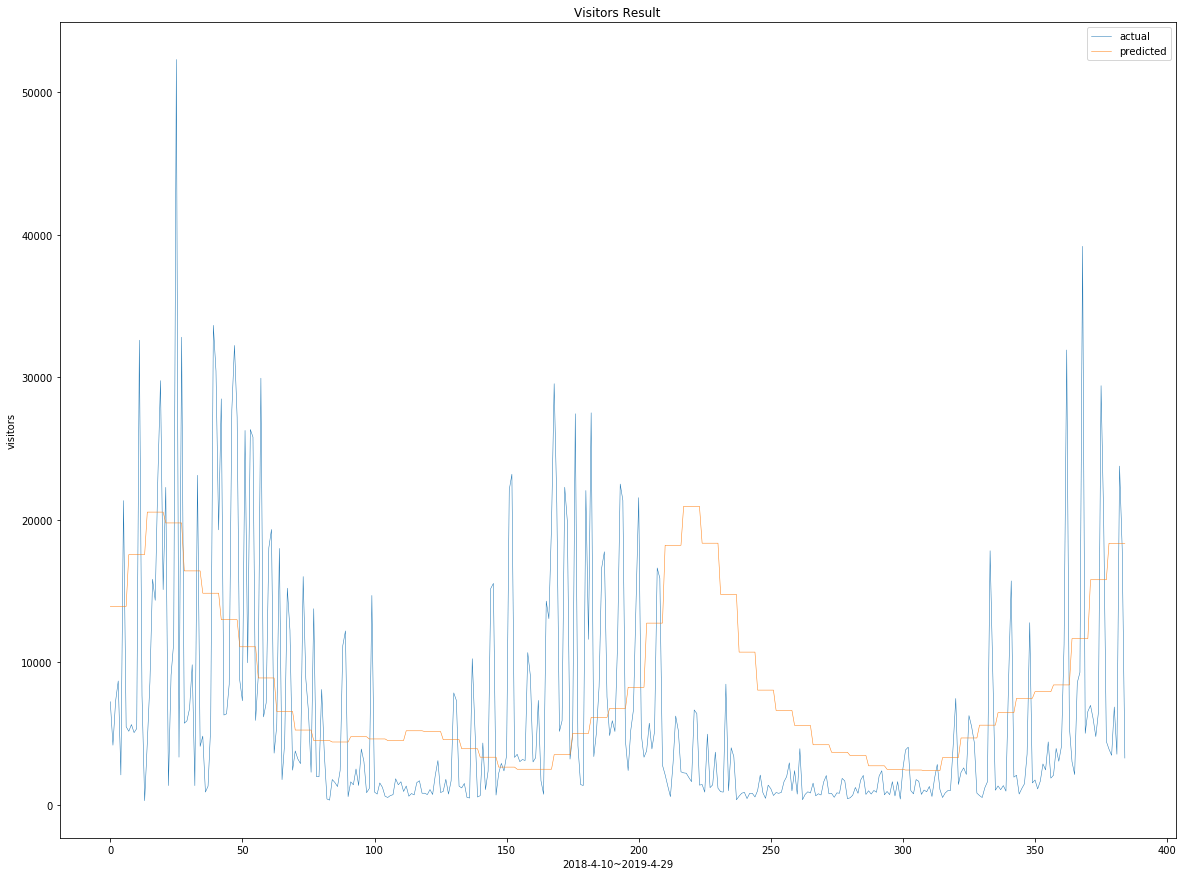

mae :  6637.421400669643
mse :  76152020.08215483
rmse :  8726.512481063373
std : 8449.7539075727


In [1]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='val_loss', patience=80, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=100, batch_size=100, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/100
3847/3847 [==============================] - 6s 2ms/step - loss: 0.0133 - val_loss: 0.0069

Epoch 00001: val_loss improved from inf to 0.00686, saving model to LSTMWmodel.h5
Epoch 2/100
3847/3847 [==============================] - 2s 634us/step - loss: 0.0123 - val_loss: 0.0064

Epoch 00002: val_loss improved from 0.00686 to 0.00635, saving model to LSTMWmodel.h5
Epoch 3/100
3847/3847 [==============================] - 2s 641us/step - loss: 0.0120 - val_loss: 0.0061

Epoch 00003: val_loss improved from 0.00635 to 0.00607, saving model to LSTMWmodel.h5
Epoch 4/100
3847/3847 [==============================] - 2s 634us/step - loss: 0.0102 - val_loss: 0.0055

Epoch 00004: val_loss improved from 0.00607 to 0.00553, saving model to LSTMWmodel.h5
Epoch 5/100
3847/3847 [==============================] - 2s 646us/step - loss: 0.0097 - val_loss: 0.0087

Epoch 00005: val_loss did not improve from 0.00553
Epoc

3847/3847 [==============================] - 2s 611us/step - loss: 0.0086 - val_loss: 0.0056

Epoch 00051: val_loss did not improve from 0.00503
Epoch 52/100
3847/3847 [==============================] - 2s 609us/step - loss: 0.0087 - val_loss: 0.0078

Epoch 00052: val_loss did not improve from 0.00503
Epoch 53/100
3847/3847 [==============================] - 2s 621us/step - loss: 0.0086 - val_loss: 0.0065

Epoch 00053: val_loss did not improve from 0.00503
Epoch 54/100
3847/3847 [==============================] - 2s 618us/step - loss: 0.0086 - val_loss: 0.0067

Epoch 00054: val_loss did not improve from 0.00503
Epoch 55/100
3847/3847 [==============================] - 2s 617us/step - loss: 0.0085 - val_loss: 0.0064

Epoch 00055: val_loss did not improve from 0.00503
Epoch 56/100
3847/3847 [==============================] - 2s 614us/step - loss: 0.0085 - val_loss: 0.0059

Epoch 00056: val_loss did not improve from 0.00503
Epoch 57/100
3847/3847 [==============================] - 2s 625u

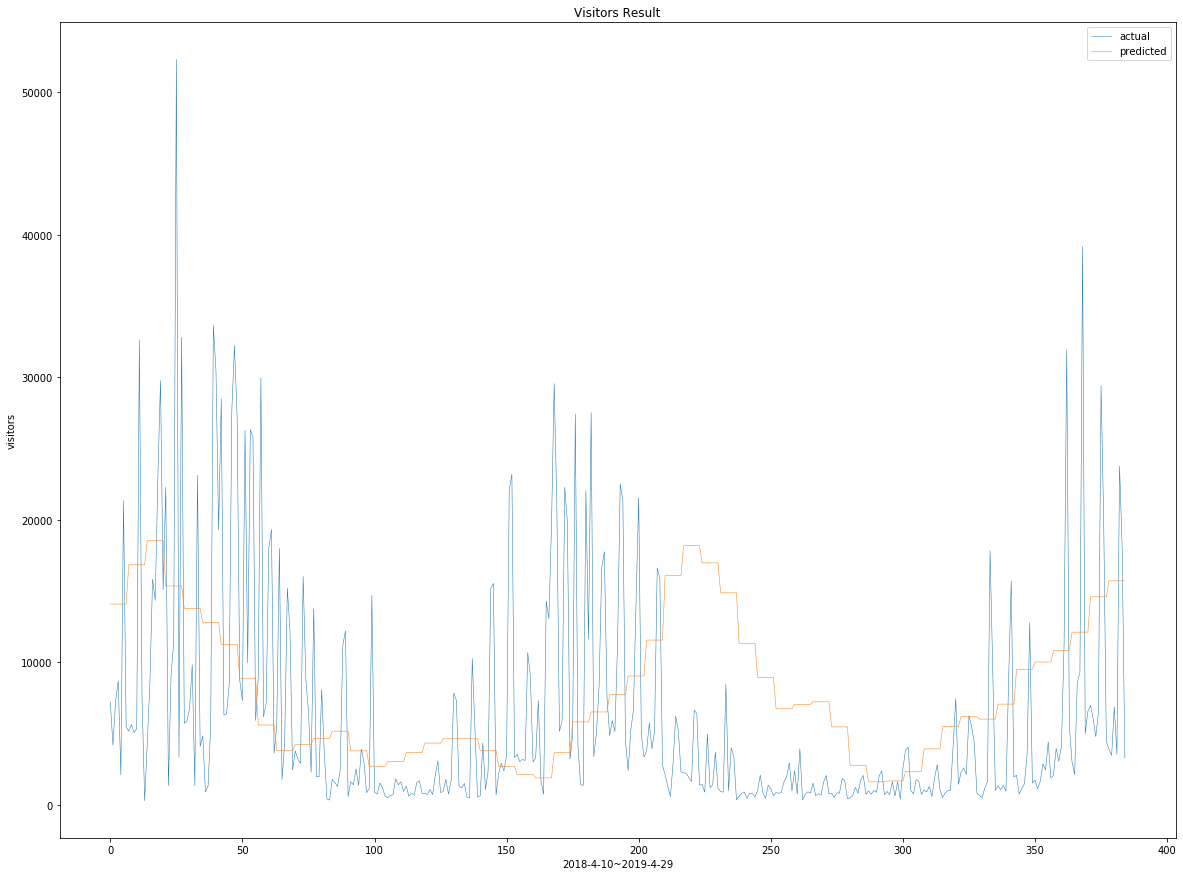

mae :  6623.951570109578
mse :  74698037.88801031
rmse :  8642.802663951683
std : 8441.255257743293


In [2]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=100, batch_size=100, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 5s 1ms/step - loss: 0.0131 - val_loss: 0.0064

Epoch 00001: val_loss improved from inf to 0.00640, saving model to LSTMWmodel.h5
Epoch 2/70
3847/3847 [==============================] - 3s 737us/step - loss: 0.0123 - val_loss: 0.0061

Epoch 00002: val_loss improved from 0.00640 to 0.00614, saving model to LSTMWmodel.h5
Epoch 3/70
3847/3847 [==============================] - 3s 725us/step - loss: 0.0120 - val_loss: 0.0077

Epoch 00003: val_loss did not improve from 0.00614
Epoch 4/70
3847/3847 [==============================] - 3s 719us/step - loss: 0.0099 - val_loss: 0.0061

Epoch 00004: val_loss improved from 0.00614 to 0.00607, saving model to LSTMWmodel.h5
Epoch 5/70
3847/3847 [==============================] - 3s 734us/step - loss: 0.0093 - val_loss: 0.0065

Epoch 00005: val_loss did not improve from 0.00607
Epoch 6/70
3847/3847 [======================

3847/3847 [==============================] - 3s 759us/step - loss: 0.0086 - val_loss: 0.0072

Epoch 00051: val_loss did not improve from 0.00443
Epoch 52/70
3847/3847 [==============================] - 3s 764us/step - loss: 0.0086 - val_loss: 0.0061

Epoch 00052: val_loss did not improve from 0.00443
Epoch 53/70
3847/3847 [==============================] - 3s 761us/step - loss: 0.0087 - val_loss: 0.0071

Epoch 00053: val_loss did not improve from 0.00443
Epoch 54/70
3847/3847 [==============================] - 3s 771us/step - loss: 0.0086 - val_loss: 0.0066

Epoch 00054: val_loss did not improve from 0.00443
Epoch 55/70
3847/3847 [==============================] - 3s 773us/step - loss: 0.0086 - val_loss: 0.0061

Epoch 00055: val_loss did not improve from 0.00443
Epoch 56/70
3847/3847 [==============================] - 3s 764us/step - loss: 0.0086 - val_loss: 0.0072

Epoch 00056: val_loss did not improve from 0.00443
Epoch 57/70
3847/3847 [==============================] - 3s 763us/step

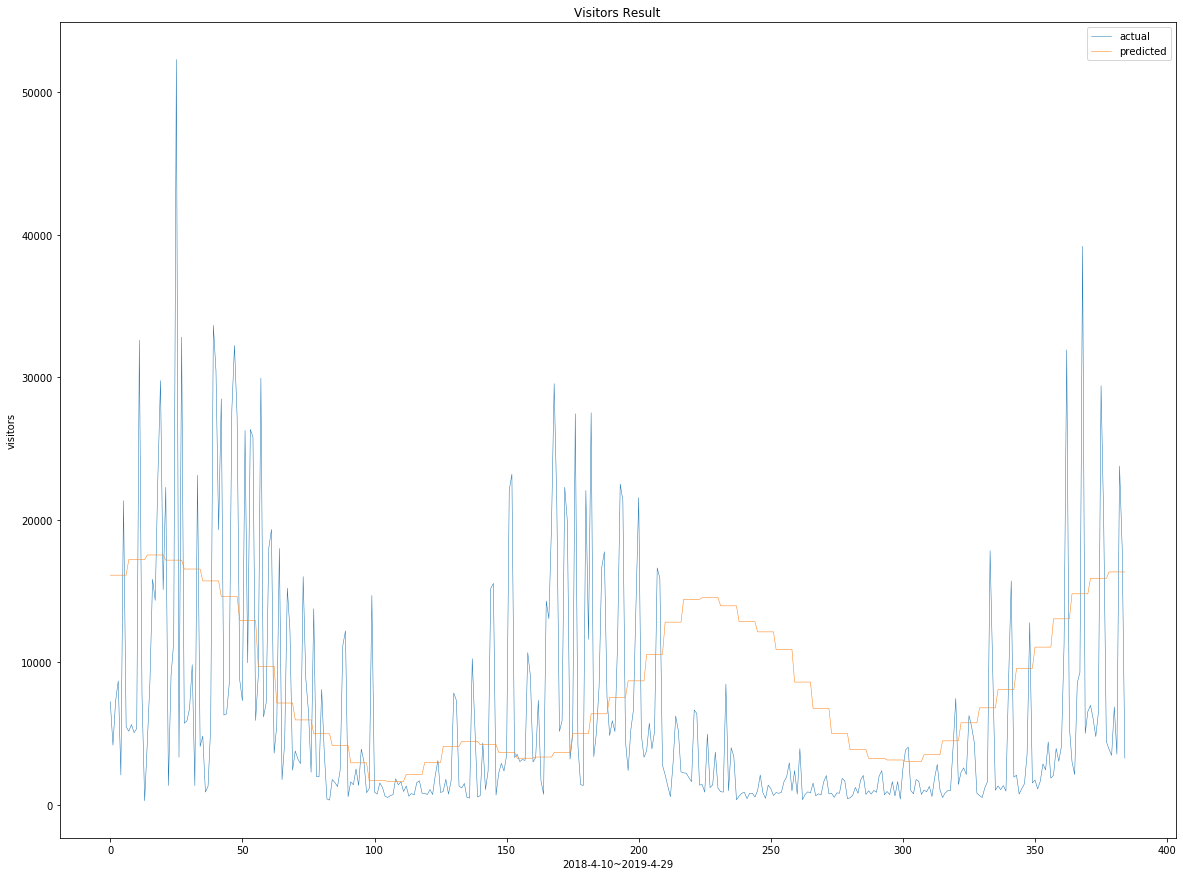

mae :  6664.004782619724
mse :  71857622.01754615
rmse :  8476.887519458198
std : 8121.948259889453


In [3]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 6s 2ms/step - loss: 0.0143 - val_loss: 0.0064

Epoch 00001: val_loss improved from inf to 0.00641, saving model to LSTMWmodel.h5
Epoch 2/70
3847/3847 [==============================] - 3s 730us/step - loss: 0.0122 - val_loss: 0.0061

Epoch 00002: val_loss improved from 0.00641 to 0.00606, saving model to LSTMWmodel.h5
Epoch 3/70
3847/3847 [==============================] - 3s 728us/step - loss: 0.0102 - val_loss: 0.0081

Epoch 00003: val_loss did not improve from 0.00606
Epoch 4/70
3847/3847 [==============================] - 3s 721us/step - loss: 0.0094 - val_loss: 0.0074

Epoch 00004: val_loss did not improve from 0.00606
Epoch 5/70
3847/3847 [==============================] - 3s 753us/step - loss: 0.0091 - val_loss: 0.0077

Epoch 00005: val_loss did not improve from 0.00606
Epoch 6/70
3847/3847 [==============================] - 3s 721us/step - loss: 0

3847/3847 [==============================] - 3s 802us/step - loss: 0.0087 - val_loss: 0.0067

Epoch 00051: val_loss did not improve from 0.00471
Epoch 52/70
3847/3847 [==============================] - 3s 795us/step - loss: 0.0087 - val_loss: 0.0063

Epoch 00052: val_loss did not improve from 0.00471
Epoch 53/70
3847/3847 [==============================] - 3s 797us/step - loss: 0.0086 - val_loss: 0.0057

Epoch 00053: val_loss did not improve from 0.00471
Epoch 54/70
3847/3847 [==============================] - 3s 799us/step - loss: 0.0086 - val_loss: 0.0067

Epoch 00054: val_loss did not improve from 0.00471
Epoch 55/70
3847/3847 [==============================] - 3s 797us/step - loss: 0.0086 - val_loss: 0.0060

Epoch 00055: val_loss did not improve from 0.00471
Epoch 56/70
3847/3847 [==============================] - 3s 804us/step - loss: 0.0085 - val_loss: 0.0054

Epoch 00056: val_loss did not improve from 0.00471
Epoch 57/70
3847/3847 [==============================] - 3s 793us/step

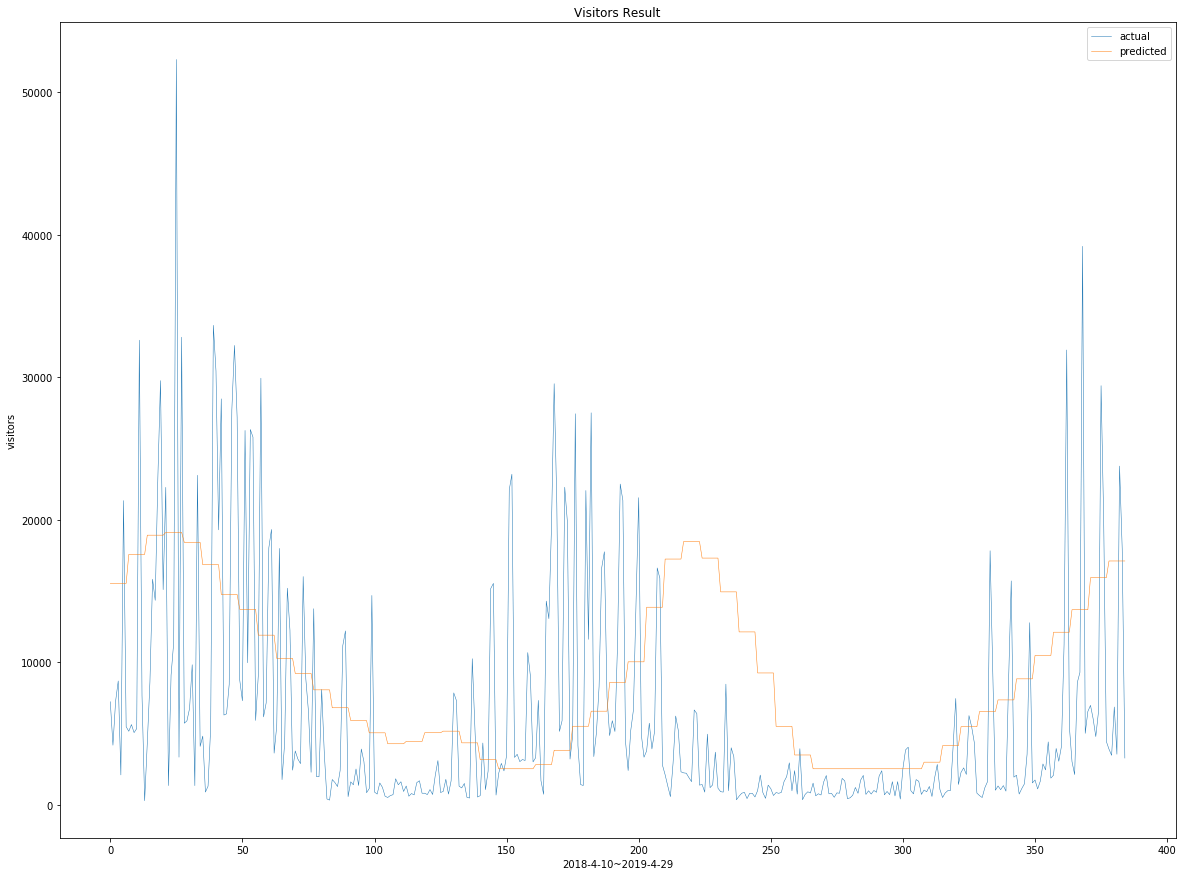

mae :  6791.634886744116
mse :  75177314.63886274
rmse :  8670.485259710827
std : 8195.09100762508


In [4]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 8s 2ms/step - loss: 0.0124 - val_loss: 0.0064

Epoch 00001: val_loss improved from inf to 0.00642, saving model to LSTMWmodel.h5
Epoch 2/70
3847/3847 [==============================] - 3s 755us/step - loss: 0.0100 - val_loss: 0.0086

Epoch 00002: val_loss did not improve from 0.00642
Epoch 3/70
3847/3847 [==============================] - 3s 723us/step - loss: 0.0093 - val_loss: 0.0077

Epoch 00003: val_loss did not improve from 0.00642
Epoch 4/70
3847/3847 [==============================] - 3s 746us/step - loss: 0.0091 - val_loss: 0.0087

Epoch 00004: val_loss did not improve from 0.00642
Epoch 5/70
3847/3847 [==============================] - 3s 783us/step - loss: 0.0092 - val_loss: 0.0091

Epoch 00005: val_loss did not improve from 0.00642
Epoch 6/70
3847/3847 [==============================] - 3s 875us/step - loss: 0.0092 - val_loss: 0.0063

Epoch 000

3847/3847 [==============================] - 3s 795us/step - loss: 0.0087 - val_loss: 0.0084

Epoch 00052: val_loss did not improve from 0.00482
Epoch 53/70
3847/3847 [==============================] - 3s 800us/step - loss: 0.0087 - val_loss: 0.0075

Epoch 00053: val_loss did not improve from 0.00482
Epoch 54/70
3847/3847 [==============================] - 3s 799us/step - loss: 0.0086 - val_loss: 0.0069

Epoch 00054: val_loss did not improve from 0.00482
Epoch 55/70
3847/3847 [==============================] - 3s 799us/step - loss: 0.0087 - val_loss: 0.0059

Epoch 00055: val_loss did not improve from 0.00482
Epoch 56/70
3847/3847 [==============================] - 3s 804us/step - loss: 0.0087 - val_loss: 0.0066

Epoch 00056: val_loss did not improve from 0.00482
Epoch 57/70
3847/3847 [==============================] - 3s 805us/step - loss: 0.0086 - val_loss: 0.0072

Epoch 00057: val_loss did not improve from 0.00482
Epoch 58/70
3847/3847 [==============================] - 3s 798us/step

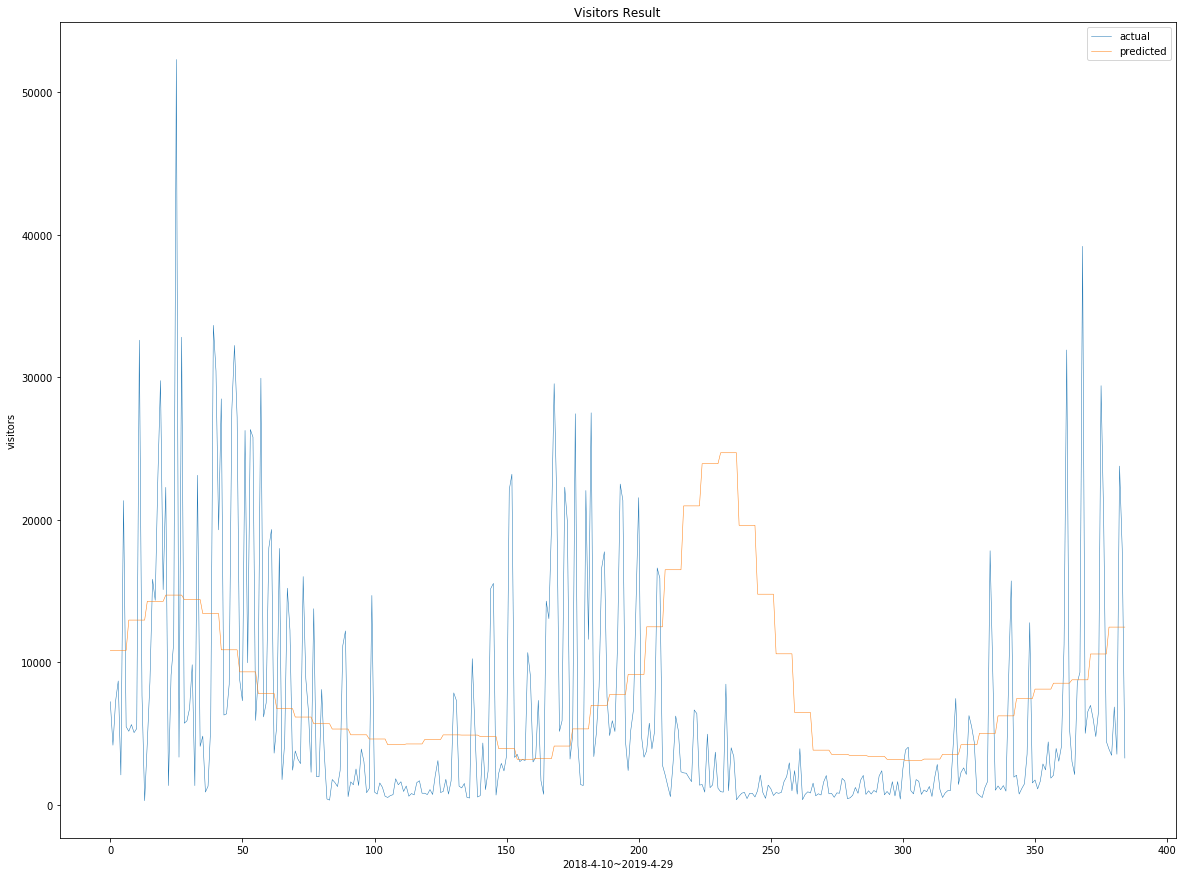

mae :  6980.122138798702
mse :  89694156.17074823
rmse :  9470.699877556475
std : 9194.679633291935


In [5]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 9s 2ms/step - loss: 0.0127 - val_loss: 0.0056

Epoch 00001: val_loss improved from inf to 0.00559, saving model to LSTMWmodel.h5
Epoch 2/70
3847/3847 [==============================] - 3s 778us/step - loss: 0.0111 - val_loss: 0.0108

Epoch 00002: val_loss did not improve from 0.00559
Epoch 3/70
3847/3847 [==============================] - 3s 752us/step - loss: 0.0096 - val_loss: 0.0090

Epoch 00003: val_loss did not improve from 0.00559
Epoch 4/70
3847/3847 [==============================] - 3s 751us/step - loss: 0.0093 - val_loss: 0.0091

Epoch 00004: val_loss did not improve from 0.00559
Epoch 5/70
3847/3847 [==============================] - 3s 751us/step - loss: 0.0093 - val_loss: 0.0083

Epoch 00005: val_loss did not improve from 0.00559
Epoch 6/70
3847/3847 [==============================] - 3s 828us/step - loss: 0.0093 - val_loss: 0.0057

Epoch 000

3847/3847 [==============================] - 3s 826us/step - loss: 0.0086 - val_loss: 0.0067

Epoch 00052: val_loss did not improve from 0.00471
Epoch 53/70
3847/3847 [==============================] - 3s 824us/step - loss: 0.0086 - val_loss: 0.0082

Epoch 00053: val_loss did not improve from 0.00471
Epoch 54/70
3847/3847 [==============================] - 3s 820us/step - loss: 0.0087 - val_loss: 0.0068

Epoch 00054: val_loss did not improve from 0.00471
Epoch 55/70
3847/3847 [==============================] - 3s 822us/step - loss: 0.0086 - val_loss: 0.0061

Epoch 00055: val_loss did not improve from 0.00471
Epoch 56/70
3847/3847 [==============================] - 3s 819us/step - loss: 0.0086 - val_loss: 0.0076

Epoch 00056: val_loss did not improve from 0.00471
Epoch 57/70
3847/3847 [==============================] - 3s 821us/step - loss: 0.0085 - val_loss: 0.0067

Epoch 00057: val_loss did not improve from 0.00471
Epoch 58/70
3847/3847 [==============================] - 3s 822us/step

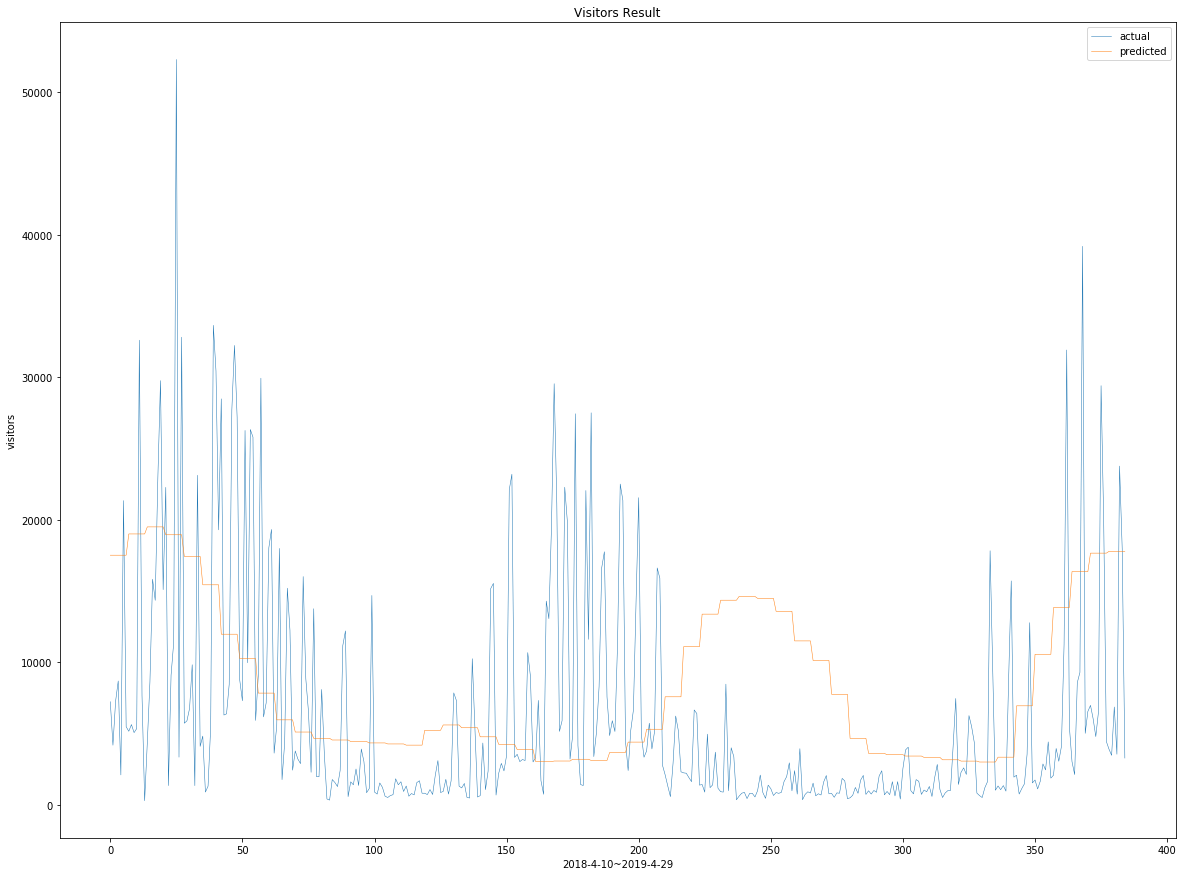

mae :  7029.0522245332795
mse :  80711818.76107231
rmse :  8983.975665654505
std : 8688.111482841303


In [6]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))

C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

학습 데이터 수: 4809
테스트 데이터 수: 385
Train on 3847 samples, validate on 962 samples
Epoch 1/70
3847/3847 [==============================] - 12s 3ms/step - loss: 0.0126 - val_loss: 0.0061

Epoch 00001: val_loss improved from inf to 0.00605, saving model to LSTMWmodel.h5
Epoch 2/70
3847/3847 [==============================] - 3s 819us/step - loss: 0.0103 - val_loss: 0.0079

Epoch 00002: val_loss did not improve from 0.00605
Epoch 3/70
3847/3847 [==============================] - 3s 828us/step - loss: 0.0093 - val_loss: 0.0083

Epoch 00003: val_loss did not improve from 0.00605
Epoch 4/70
3847/3847 [==============================] - 3s 838us/step - loss: 0.0094 - val_loss: 0.0093

Epoch 00004: val_loss did not improve from 0.00605
Epoch 5/70
3847/3847 [==============================] - 3s 804us/step - loss: 0.0091 - val_loss: 0.0077

Epoch 00005: val_loss did not improve from 0.00605
Epoch 6/70
3847/3847 [==============================] - 3s 809us/step - loss: 0.0091 - val_loss: 0.0075

Epoch 00

3847/3847 [==============================] - 3s 828us/step - loss: 0.0086 - val_loss: 0.0063

Epoch 00052: val_loss did not improve from 0.00457
Epoch 00052: early stopping
Model loaded


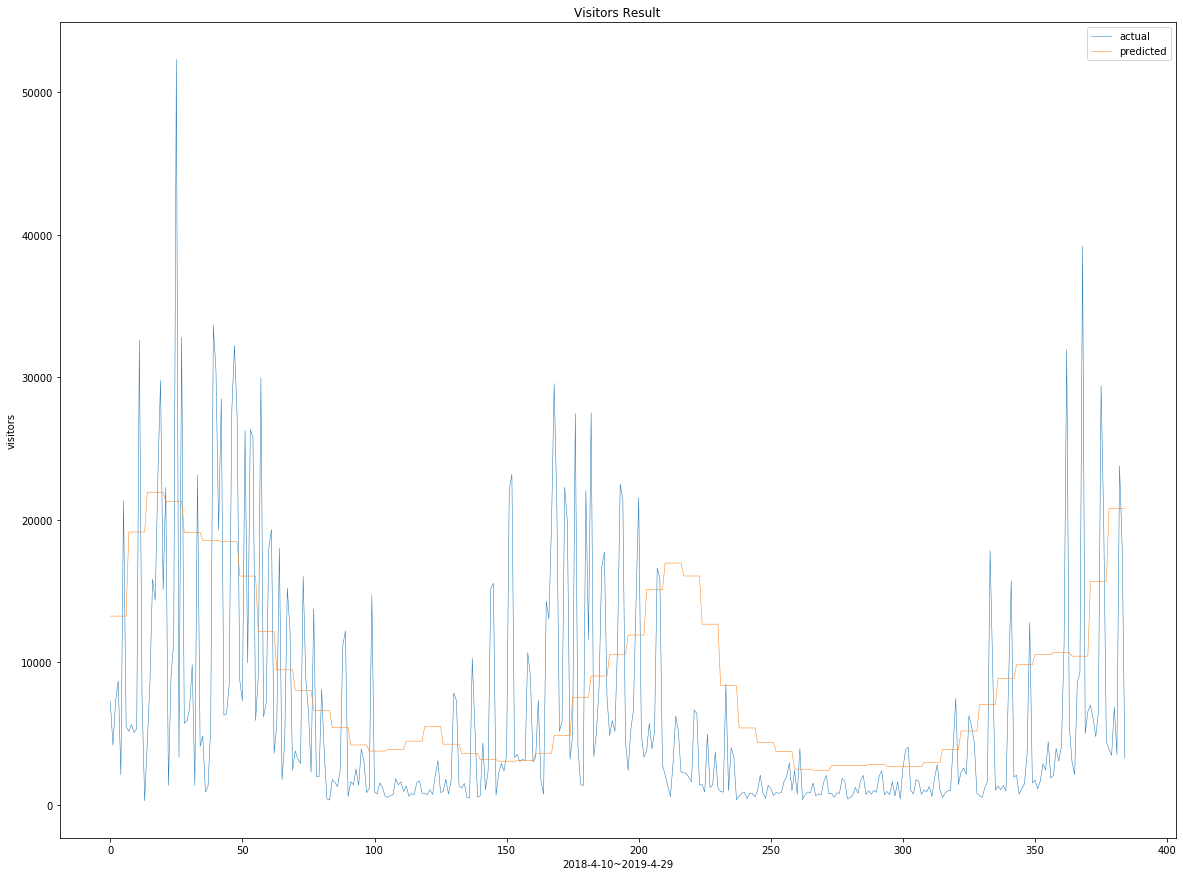

mae :  6240.472230113636
mse :  66634315.634283885
rmse :  8162.9844808307635
std : 7719.364292375979


In [7]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, concatenate
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#***************************파일을 읽고, 날짜 column생성*********************************
df = pd.read_csv('SeoulGrandPark2.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)
df = df.set_index('날짜')
#**************************train set과 test set분할**************************************
split_date_last = '2018-4-16'
split_date_start = '2017-8-29'
#+8달부터 계산된다.
#*****************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터(앞으로도 계속)***
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
#**************************데이터를 사용가능하도록 변환**********************************
train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***************************이어서 시계열 데이터만 처리********************************************
#***************************주단위 데이터로 변환.**************************************************
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#*****************************이어서 주단위 시계열 데이터 처리************************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)

X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)

X_train2LSTMc = X_train2LSTM.iloc[0:0].copy()
for i in range(len(trainLSTM)):
    X_train2LSTMc = pd.concat([X_train2LSTMc, X_train2LSTM[int(i/7):int(i/7)+1]], axis=0)

X_test2LSTMc = X_test2LSTM.iloc[0:0].copy()
for i in range(len(testLSTM)):
    X_test2LSTMc = pd.concat([X_test2LSTMc, X_test2LSTM[int(i/7):int(i/7)+1]], axis=0)

#*****************************주단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_train2LSTMc = X_train2LSTMc.values
X_test2LSTMc= X_test2LSTMc.values

X_train_t2LSTMc = X_train2LSTMc.reshape(X_train2LSTMc.shape[0], week, 1)
X_test_t2LSTMc = X_test2LSTMc.reshape(X_test2LSTMc.shape[0], week, 1)
#*******************************이제는 일단위 시계열 데이터 처리 (반복)***************************
dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)

for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_trainLSTM = X_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]
y_trainLSTM = y_trainLSTM.iloc[weekto*7-dayto-6:-(len(trainLSTM)%7)]

X_testLSTM = X_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]
y_testLSTM = y_testLSTM.iloc[weekto*7-dayto-6:-(len(testLSTM)%7)]

#*****************************일단위 시계열 데이터를 model에 들어갈 수 있게 reshape*****************
X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)
#******************************주단위 LSTM모델링**************************************************
model2 = Sequential() 
model2.add(LSTM(week, input_shape=(week, 1), return_sequences = True))
model2.add(LSTM(week))
model2.add(Dense(week, kernel_initializer='he_normal', activation='relu'))
#******************************일단위 LSTM모델링***************************************************
model = Sequential()
model.add(LSTM(day, input_shape=(day, 1), return_sequences = True))
model.add(LSTM(day))
model.add(Dense(day, activation='relu'))
#*********이어서 DNN용 특성위주 데이터 정리 및 모델에 맞게 변환***********************************
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]

X_train = X_train.iloc[weekto*7-7:-(len(trainLSTM)%7)]
X_test = X_test.iloc[weekto*7-7:-(len(testLSTM)%7)]

X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

sc2 = MinMaxScaler()

X_train_sc = sc2.fit_transform(X_train)
X_test_sc = sc2.transform(X_test)

y_train_sc = sc2.fit_transform(y_train)
y_test_sc = sc2.transform(y_test)

print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))
#*****************************************DNN 모델링*************************************************
class DNN(models.Sequential):
    def __init__(self, Nin):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(500, activation='relu',input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(250, activation='relu', name='Hidden-2'))
        self.add(layers.Dense(100, activation='relu', name='Hidden-3'))
        self.add(layers.Dense(50, activation='relu'))
        
model3 = DNN(X_train_sc.shape[1])
#***************************일단위 LSTM모델과 DNN모델을 concatenate 및 모델 생성**********************
combinedInput = model2.output

x = Dense(100, kernel_initializer='he_normal', activation='relu')(combinedInput)
x = Dense(10, kernel_initializer='he_normal', activation='relu')(x)
x = Dense(1)(x)

model4 = Model(inputs= model2.input, outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)
#************************************모델 학습************************************************************
mcp_save = ModelCheckpoint('LSTMWmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='min')

early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
model4.fit(X_train_t2LSTMc, y_trainLSTM, validation_split = 0.2, epochs=70, batch_size=50, callbacks=[early_stop, mcp_save])

#모델 세이브
from keras.models import load_model
model4 = load_model('LSTMWmodel.h5')
print("Model loaded")
#**********************************plot을 이용한 그래프 그리기******************************************
plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel(X_test.index.values[0] + '~' + X_test.index.values[-1])
plt.ylabel('visitors')
ynewtest = sc.inverse_transform(y_testLSTM)
plt.plot(ynewtest, label='actual')
Y_pred = model4.predict(X_test_t2LSTMc)
ynew = sc.inverse_transform(Y_pred)
plt.plot(ynew, label='predicted')
plt.legend()
plt.show()
#********************************test셋에 대해서 오차값 구하기*******************************************
mse = np.square(ynewtest - ynew).mean()
rmse = mse ** 0.5
print("mae : ", np.absolute(ynewtest - ynew).mean())
print("mse : ", mse)
print("rmse : ", rmse)
print("std :", np.std(ynewtest-ynew))